# import scientific libraries for feature engineering

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [76]:
data = load_dataset("titanic")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
columns = ['alive','alone','embark_town','deck','adult_male','who']

In [7]:
data1 = data.drop(columns, axis=1)

In [8]:
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


In [9]:
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Max value of age column : {data1['age'].max()}")

Max value of age column : 80.0


In [11]:
print("Max value of age column:", data1['age'].max())

Max value of age column: 80.0


In [12]:
print("Min value of age column:",data1['age'].min())

Min value of age column: 0.42


In [13]:
bins = [0, 5, 17, 25, 50, 80]

In [14]:
labels = ['infant', 'kid', 'young', 'adult', 'old']

In [15]:
data1['age'] = pd.cut(data1['age'], bins = bins, labels = labels)

In [16]:
data1['age']

0      young
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    young
888      NaN
889    adult
890    adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['infant' < 'kid' < 'young' < 'adult' < 'old']

In [17]:
pd.DataFrame(data1['age'].value_counts())

,age
adult,349
young,188
kid,69
old,64
infant,44


In [18]:
data1['age'].value_counts()

adult     349
young     188
kid        69
old        64
infant     44
Name: age, dtype: int64

data2['age']

In [19]:
data1['age'].mode()

0    adult
Name: age, dtype: category
Categories (5, object): ['infant' < 'kid' < 'young' < 'adult' < 'old']

In [20]:
data3 = data1.fillna({'age':data1['age'].mode()[0]})

In [21]:
data3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,young,1,0,7.2500,S,Third
1,1,1,female,adult,1,0,71.2833,C,First
2,1,3,female,adult,0,0,7.9250,S,Third
3,1,1,female,adult,1,0,53.1000,S,First
4,0,3,male,adult,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,adult,0,0,13.0000,S,Second
887,1,1,female,young,0,0,30.0000,S,First
888,0,3,female,adult,1,2,23.4500,S,Third
889,1,1,male,adult,0,0,30.0000,C,First


In [22]:
data3['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
print("How many 'S' on embarked column:",data3[data3['embarked'] == 'S'].shape[0])

How many 'S' on embarked column: 644


In [24]:
print("How many 'C' on embarked column:",data3[data3['embarked']== 'C'].shape[0])

How many 'C' on embarked column: 168


In [25]:
print("How many 'Q' on embarked column:",data3[data3['embarked']== 'Q'].shape[0])

How many 'Q' on embarked column: 77


We find that still 2 rows have nan values in the embarked columns. Hence we will fill with mode value, i.e, the value 'S' has more repetitions, so we will replace nan with 'S'

In [26]:
data3 = data1.fillna({'embarked':'S'})

In [27]:
data3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,young,1,0,7.2500,S,Third
1,1,1,female,adult,1,0,71.2833,C,First
2,1,3,female,adult,0,0,7.9250,S,Third
3,1,1,female,adult,1,0,53.1000,S,First
4,0,3,male,adult,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,adult,0,0,13.0000,S,Second
887,1,1,female,young,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,adult,0,0,30.0000,C,First


In [28]:
data3.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [29]:
data3[['pclass','survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [30]:
data3[['sex','survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [31]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]

In [44]:
labels = ['low','medium-low','medium','high']

In [45]:
data3['fare']=pd.cut(data3["fare"],bins=bins,labels=labels)

In [46]:
data4 = data3.drop('class',axis=1)

C:\Users\supre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='survived', ylabel='Density'>

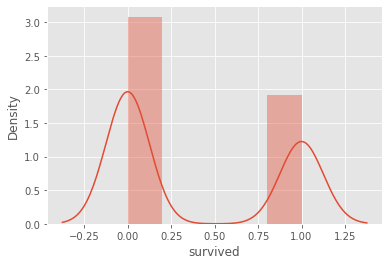

In [47]:
sns.distplot(data4['survived'])

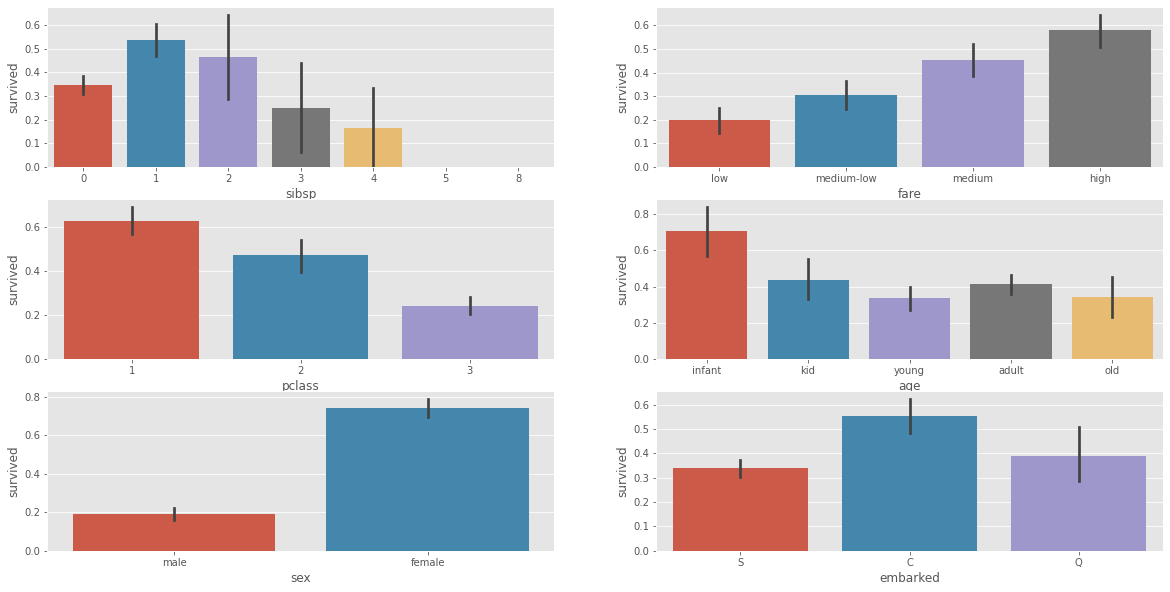

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.barplot(x='sibsp',y='survived',data=data4)
plt.subplot(322)
sns.barplot(x='fare',y='survived',data=data4)
plt.subplot(323)
sns.barplot(x='pclass',y='survived',data=data4)
plt.subplot(324)
sns.barplot(x='age',y='survived',data=data4)
plt.subplot(325)
sns.barplot(x='sex',y='survived',data=data4)
plt.subplot(326)
sns.barplot(x='embarked',y='survived',data = data4);

In [59]:
data4

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,young,1,0,low,S
1,1,1,female,adult,1,0,medium-high,C
2,1,3,female,adult,0,0,low,S
3,1,1,female,adult,1,0,medium,S
4,0,3,male,adult,0,0,low,S
...,...,...,...,...,...,...,...,...
886,0,2,male,adult,0,0,low,S
887,1,1,female,young,0,0,medium-low,S
888,0,3,female,NaN,1,2,medium-low,S
889,1,1,male,adult,0,0,medium-low,C


# Encoding non-numeric values of all the fields to numeric by pandas get_dummies method

In [53]:
dummies = ['fare','age','embarked','sex']
dummy_data = pd.get_dummies(data4[dummies])
#dummy_data

In [56]:
dummy_data.shape

(891, 14)

In [57]:
data5 = pd.concat([data4,dummy_data],axis=1)
data5.drop(dummies,axis=1,inplace=True)


In [59]:
data5

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_infant,age_kid,age_young,age_adult,age_old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0
889,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


# import libraries to train the model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# split the dataset to train and test and take out the label column from the dataset and assign it to the variable Y

In [68]:
# X has independent values, and Y has dependent values
X = data5.drop('survived',axis=1)
Y = data5['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=0)

# Training a model

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Checking accuracy score of the trained model and computing confusion matrix

In [72]:
accuracy_score(Y_pred, Y_test)


0.8067796610169492

In [73]:
confusion_matrix(Y_pred, Y_test)

array([[158,  31],
       [ 26,  80]], dtype=int64)